In [2]:
import matplotlib.pyplot as plt
import numpy as np
from math import tan, pi
from itertools import product

In [3]:
def lerp(a, b, t):
    return (t * a) + ((1 - t) * b)


def weight_function(x: np.array, frequencies: np.array, weight_decay: float, frequency_importance: float):
    decay_exponent = tan((pi / 2) * (1 - weight_decay))
    decay_weights = (1 - x ** decay_exponent) 
    frequency_weights = lerp(frequencies, 1, frequency_importance)
    weights = decay_weights * frequency_weights
    weights /= weights.sum()
    return weights


In [4]:
def generate_random_frequencies(n, num_unique_tokens=10000, total_tokens=1000000, a=1.5):
    """
    Generate a list of random word frequencies for a sentence, following a Zipfian distribution.

    Parameters:
    n (int): Number of words in the sentence.
    num_unique_tokens (int): Number of unique tokens in the language.
    total_tokens (int): Total number of tokens in the language.
    a (float): Zipf's exponent.

    Returns:
    list of int: List of word frequencies for the sentence.
    """
    # Generate Zipfian distributed ranks
    ranks = np.arange(1, num_unique_tokens + 1)
    zipfian_distribution = 1 / (ranks ** a)

    # Normalize to get frequencies that sum to the total number of tokens
    frequencies = zipfian_distribution / zipfian_distribution.sum() * total_tokens
    frequencies = frequencies.astype(int)  # Convert to integer counts

    # Ensure the sum of frequencies equals total_tokens
    while frequencies.sum() < total_tokens:
        frequencies[np.random.choice(num_unique_tokens)] += 1
    while frequencies.sum() > total_tokens:
        frequencies[np.random.choice(num_unique_tokens)] -= 1

    # Sample frequencies for each word in the sentence
    sentence_frequencies = np.random.choice(frequencies, n, replace=True)

    return sentence_frequencies

/tmp/ipykernel_446604/893625408.py:21: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  axs[0].set_ylim(0, None)
/tmp/ipykernel_446604/893625408.py:28: UserWarning: Attempt to set non-positive xlim on a log-scaled axis will be ignored.
  axs[1].set_xlim(0, None)


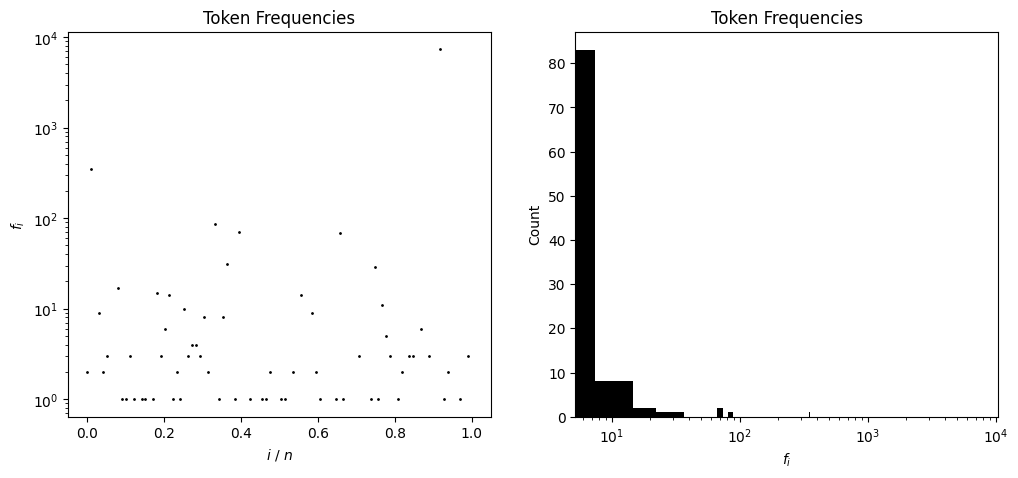

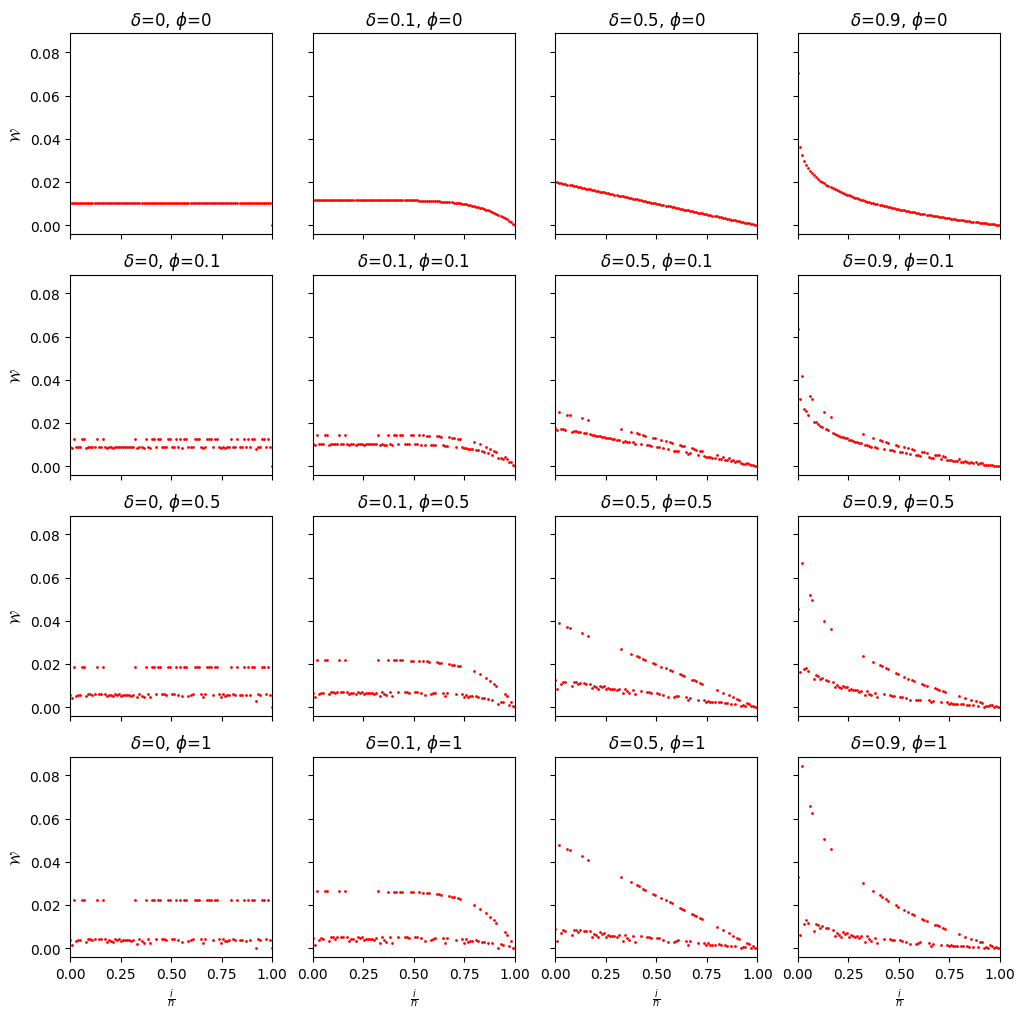

In [23]:
e = 1e-16
n = 100
x = np.linspace(0, 1, n)
np.random.seed(0)
frequencies = generate_random_frequencies(n)
log_frequencies = np.log(frequencies + e)
relative_frequencies = log_frequencies / log_frequencies.max() + e
inverse_frequencies = 1 - relative_frequencies
# inverse_frequencies /= inverse_frequencies.sum()

weight_decays = [0, 0.1, 0.5, 0.9]
frequency_importances = [0, 0.1, 0.5, 1]


fig, axs = plt.subplots(1, 2, figsize=(12, 5))
axs[0].scatter(x, frequencies, s=1, c="black")
axs[0].set_title("Token Frequencies")
axs[0].set_xlabel("$i~/~n$")
axs[0].set_ylabel("$f_i$")
axs[0].set_yscale("log")
axs[0].set_ylim(0, None)

axs[1].hist(frequencies, bins=1000, color="black")
axs[1].set_title("Token Frequencies")
axs[1].set_xlabel("$f_i$")
axs[1].set_ylabel("Count")
axs[1].set_xscale("log")
axs[1].set_xlim(0, None)
plt.show()

fig, axs = plt.subplots(len(frequency_importances), len(weight_decays), sharex="col", sharey="all", figsize=(12, 12))

for (i, frequency_importance), (j, weight_decay) in product(enumerate(frequency_importances), enumerate(weight_decays)):
    weights = weight_function(x, inverse_frequencies, weight_decay, frequency_importance)
    axs[i, j].scatter(x, weights, s=1, c="red", label="Weights")
    axs[i, j].set_title(f"$\delta$={weight_decay}, $\\phi$={frequency_importance}")
    axs[i, j].set_xlim(0, 1)
    if i == len(frequency_importances) - 1:
        axs[i, j].set_xlabel("$\\frac{i}{n}$")
    if j == 0:
        axs[i, j].set_ylabel("$\mathcal{W}$")

plt.savefig("weight-function.svg")
plt.show()


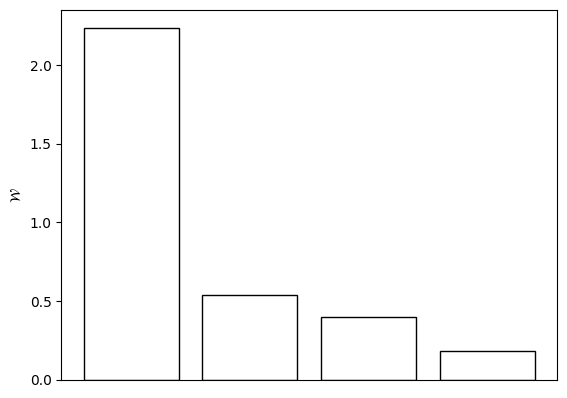

In [28]:
# Example weights

example_weights = [2.24, 0.54, 0.4, 0.18]

plt.bar(range(len(example_weights)), example_weights, fill=False, edgecolor="black")
plt.xticks([])
plt.ylabel("$\mathcal{W}$")
plt.savefig("example-weights.svg")